In [1]:
# Gerekli kütüphaneleri içe aktarın
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation


In [2]:
def generate_data(t):
    """Sine dalgası verilerini üretir."""
    x = np.linspace(-5, 5, 100)  # x ekseni verilerini oluşturur
    y = np.linspace(-5, 5, 100)  # y ekseni verilerini oluşturur
    X, Y = np.meshgrid(x, y)     # x ve y eksenlerinin meshgrid'ini oluşturur
    Z = np.sin(np.sqrt(X**2 + Y**2) - 0.1 * t)  # Z eksenindeki verileri hesaplar
    return X, Y, Z


(-1.0, 1.0)

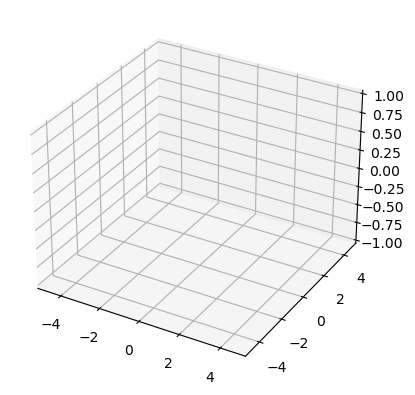

In [3]:
# Figür ve eksenleri oluşturun
fig = plt.figure()  # Yeni bir figür oluşturur
ax = fig.add_subplot(111, projection='3d')  # 3D eksenler ekler

# Eksen sınırlarını ayarlayın
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-1, 1)


In [4]:
# Başlangıç veri seti
X, Y, Z = generate_data(0)  # Başlangıç verilerini üretir
surf = ax.plot_surface(X, Y, Z, cmap='viridis')  # İlk yüzey çizimini yapar


In [5]:
def init():
    """Animasyonun başlangıç fonksiyonu."""
    return [surf]  # Başlangıçta görünen yüzeyi döndürür


In [6]:
def animate(t):
    """Animasyonun her çerçevesi için veri güncelleme fonksiyonu."""
    global surf
    surf.remove()  # Mevcut yüzeyi kaldırır
    X, Y, Z = generate_data(t)  # Yeni verileri üretir
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')  # Yeni yüzeyi çizer
    return [surf]  # Güncellenmiş yüzeyi döndürür


In [9]:
# Animatörü başlatın
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=50, blit=False)

# GIF olarak kaydedin
anim.save('sine_wave_animation_1.gif', writer='pillow', fps=30)

In [10]:
# Plotu gösterin
plt.show()